# Jane Street "features.csv" EDA
I recently responded to [this discussion post](https://www.kaggle.com/c/jane-street-market-prediction/discussion/202165) which brought up that the null value counts (per feature) followed a pattern. This notebook goes through setting up the problem, then displays a correlation matrix heatmap relating features and tags from "features.csv". Spoiler alert: The **correlation matrix is trippy!**

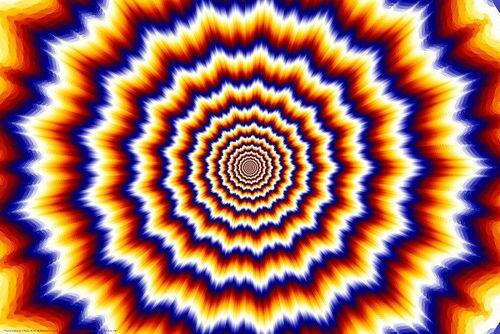

In [ ]:
# Import data & libraries
import numpy as np
import pandas as pd

pd.options.display.max_columns = None

train = pd.read_csv('/kaggle/input/jane-street-market-prediction/train.csv')
feat = pd.read_csv('/kaggle/input/jane-street-market-prediction/features.csv')

## Count null values in train.csv

In [ ]:
# Count null values, per feature
nulls = []
for i in range(130):
    col =  f'feature_{i}'
    nulls.append([col, train[col].isna().sum()])
    
nulls_df = pd.DataFrame(nulls, columns=['Feature', 'Nulls'])

## Plot 1: Null Counts per Feature

In [ ]:
# Using plotly because it's interactive, allowing for easy identification of features
import plotly.express as px
fig = px.bar(nulls_df, x='Feature', y='Nulls', title='Nulls per Feature')
fig.show()

### As shown, there are some interesting patterns.
* For the first bunch of features, there are the same number of nulls in pairs
* Starting at feature_72, every 6 features has the same number of nulls

Next, we'll use this plot as the basis for exploring relationships between features and tags.

## "features.csv" Exploration
Looking at the nulls plot, we see some patterns. Are they explained by the tags in "features.csv"?

### Features 7, 8, 17, 18, 27, and 28
All have tags 4 and 6 as True.

In [ ]:
feat[feat['feature'].isin(['feature_7', 'feature_8', 'feature_17', 'feature_18', 'feature_27', 'feature_28'])]

### Features 72, 78, 84 and 90
All have tags 4 and 24 as True.

In [ ]:
feat[feat['feature'].isin(['feature_72', 'feature_78', 'feature_84', 'feature_90'])]

### Tags 72 - 77
This is one "cycle" of the pattern visible in the higher features.
All have tags 23 and 27 as True.

In [ ]:
feat[feat['feature'].isin(['feature_72', 'feature_73', 'feature_74', 'feature_75', 'feature_76', 'feature_77'])]


## Plot 2: Tag Correlation Matrix
Shows the correlation between each tag, with respect to the True/False values for each feature.
Nothing out of the ordinary here: There's no apparent order to the tags.

In [ ]:
#from matplotlib import pyplot as plt
#plt.imshow(feat.corr(), cmap='hot')
#plt.show()

fig = px.imshow(feat.corr(), color_continuous_scale='hot')
fig.show()

# Plot 3: Feature Correlation Matrix
Shows the correlation between each **feature**, with respect to the True/False values for each tag.

In [ ]:
flip = feat.drop(columns=['feature'])
flip = flip.transpose()

#plt.figure(figsize=(8,8))
#plt.imshow(flip.corr(), cmap='hot')

fig = px.imshow(flip.corr(), color_continuous_scale='hot', width=900, height=600)
fig.show()

# Woah! Looks like there are some interesting patterns. Why do you think this is?

Thank you to @abdolazimrezaei who posed the question originally. Hope you enjoyed the post!

## Now, let's explore the train.csv data

In [ ]:
fig = px.imshow(train.corr(), color_continuous_scale='hot', width=900, height=600)
fig.show()

In [ ]:
fig = px.imshow(abs(train.corr()), color_continuous_scale='hot', width=900, height=600)
fig.show()

In [ ]:
fig = px.imshow(abs(train.corr()) > .7, color_continuous_scale='hot', width=900, height=600)
fig.show()